# **üçΩÔ∏è Restaurant Tips Analysis**

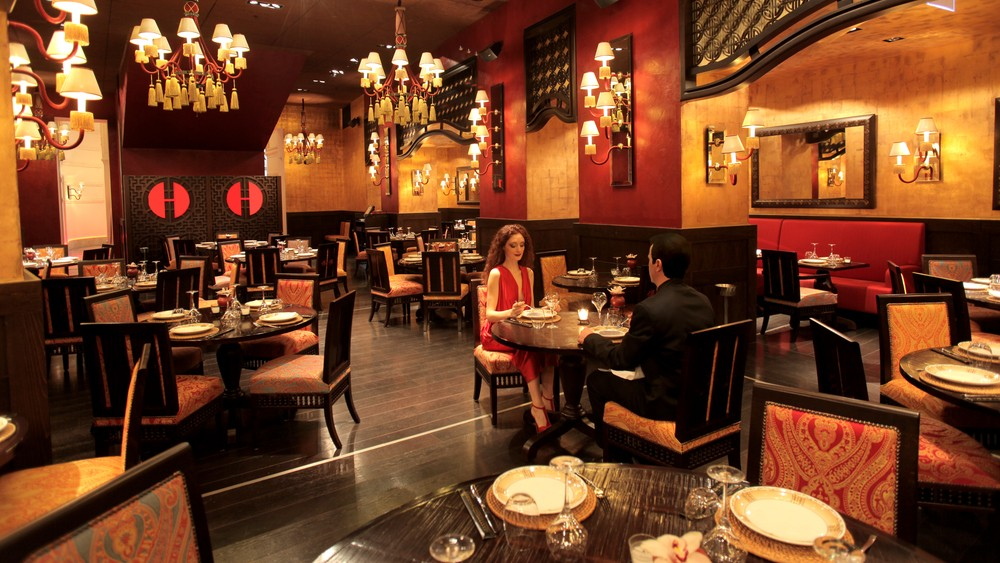

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **üë£ The First Steps**

### **üì• Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **üîç Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head()

id  total_bill   tip     sex smoker  day    time  size
0   0       16.99  1.01  Female     No  Sun  Dinner     2
1   1       10.34  1.66    Male     No  Sun  Dinner     3
2   2       21.01  3.50    Male     No  Sun  Dinner     3
3   3       23.68  3.31    Male     No  Sun  Dinner     2
4   4       24.59  3.61  Female     No  Sun  Dinner     4

> üéâ Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... ü§î**
>
> We have string columns considered as objects.

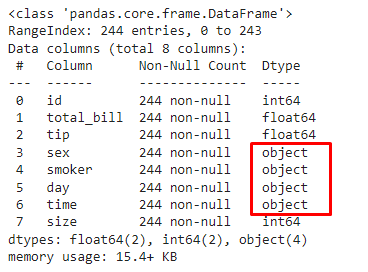

Let's fix their types and make them string:

In [8]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [9]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [10]:
# PUT YOUR CODE HERE
df.describe()

id  total_bill       tip      size
count      244.0       244.0     244.0     244.0
mean       121.5   19.785943  2.998279  2.569672
std    70.580923    8.902412  1.383638    0.9511
min          0.0        3.07       1.0       1.0
25%        60.75     13.3475       2.0       2.0
50%        121.5      17.795       2.9       2.0
75%       182.25     24.1275    3.5625       3.0
max        243.0       50.81      10.0       6.0

Great! Now we know a little more about our data.

‚û°Ô∏è Let's move forward!

## **üí∏ Tip value influencers**

### **üö¨ Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [11]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [12]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

id  total_bill   tip     sex smoker   day    time  size
174  174       16.82   4.0    Male    Yes   Sun  Dinner     2
193  193       15.48  2.02    Male    Yes  Thur   Lunch     2
107  107       25.21  4.29    Male    Yes   Sat  Dinner     2
67    67        3.07   1.0  Female    Yes   Sat  Dinner     1
230  230       24.01   2.0    Male    Yes   Sat  Dinner     4

Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [23]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [24]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

id  total_bill   tip     sex smoker   day    time  size
144  144       16.43   2.3  Female     No  Thur   Lunch     2
25    25       17.81  2.34    Male     No   Sat  Dinner     4
68    68       20.23  2.01    Male     No   Sat  Dinner     2
127  127       14.52   2.0  Female     No  Thur   Lunch     2
44    44        30.4   5.6    Male     No   Sun  Dinner     4

#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **üåè Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [15]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you üòâ)

In [16]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

0
min      1.0000
max     10.0000
mean     2.9983
median   2.9000

##### **üö¨ Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [17]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [18]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

0
min      1.0000
max     10.0000
mean     3.0087
median   3.0000

##### **üö≠ Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [22]:
# YOUR CODE
non_smokers_tip_min = non_smoker_df['tip'].min()
non_smokers_tip_max = non_smoker_df['tip'].max()
non_smokers_tip_mean = non_smoker_df['tip'].mean()
non_smokers_tip_median = non_smoker_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [20]:
# YOUR CODE
non_smokers_values = [non_smoker_tip_min, non_smoker_tip_max, non_smoker_tip_mean, non_smoker_tip_median]
# Round all the values to 4 decimal
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

0
min     1.0000
max     9.0000
mean    2.9919
median  2.7400

##### **üìù Conclusion**

Let's show the retrieved results together (we already have the code written for you üòâ):

In [25]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

Common   Smokers  Non-smokers
min      1.000000   1.00000     1.000000
max     10.000000  10.00000     9.000000
mean     2.998279   3.00871     2.991854
median   2.900000   3.00000     2.740000

**Insights based on measures of central tendency comparison:**

---

1. Smokers have tendency to tip more than non-smokers (Average tip $3.0087 compared to $2.9918)
2. Insight 1

**General conclusion:**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **üåè Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

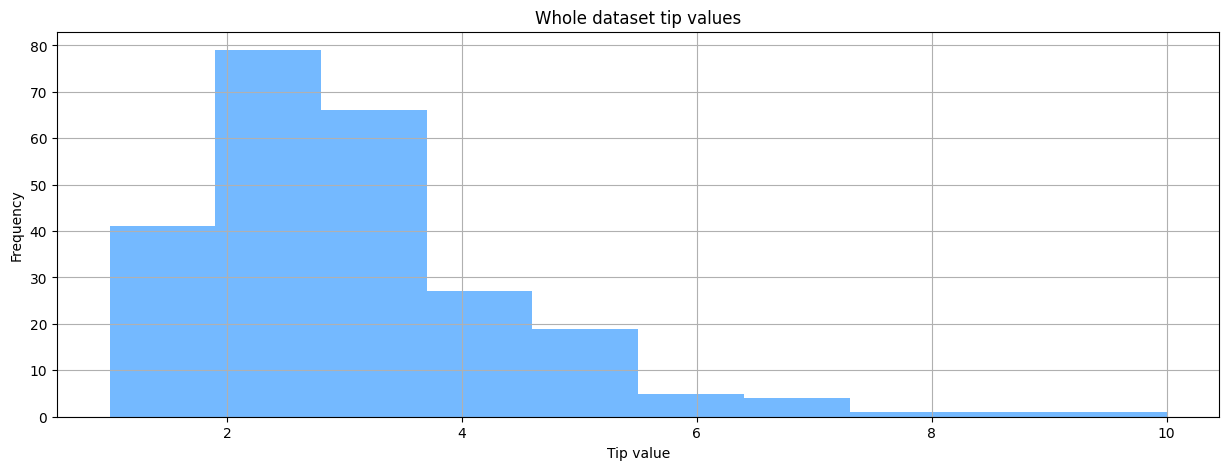

In [26]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.show()

##### **üö¨ Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

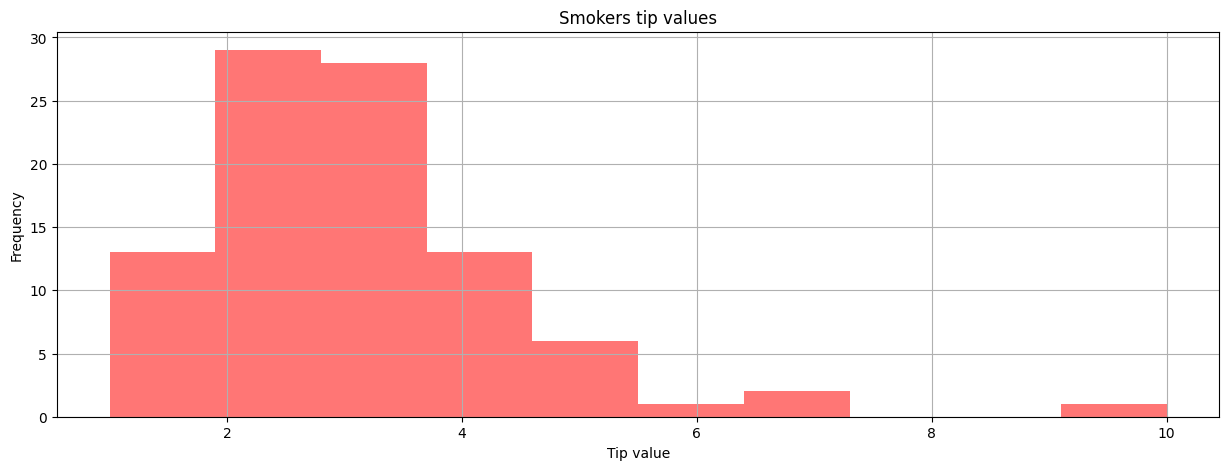

In [27]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

plt.show()

##### **üö≠ Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

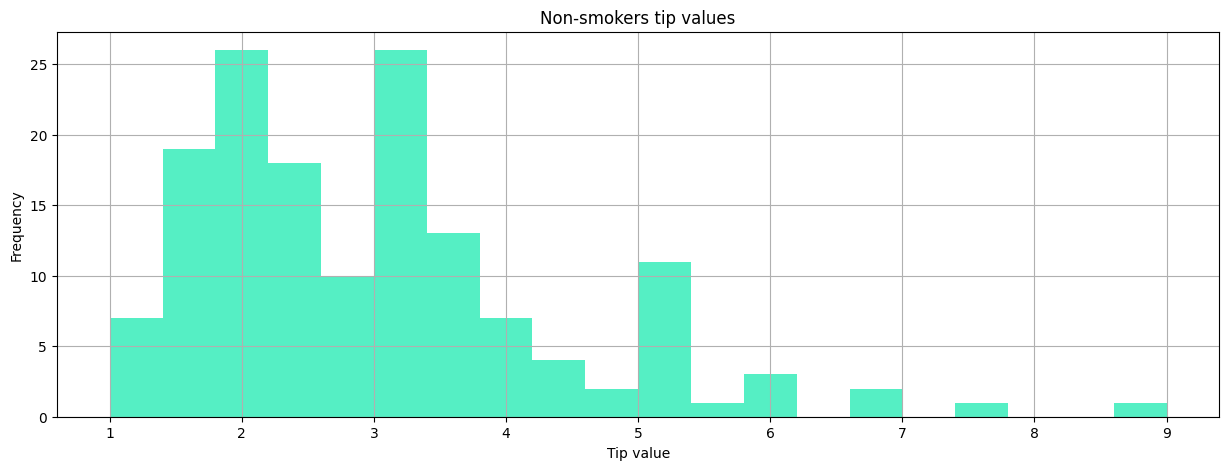

In [54]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins = 20, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

plt.show()

##### **‚≠ê Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

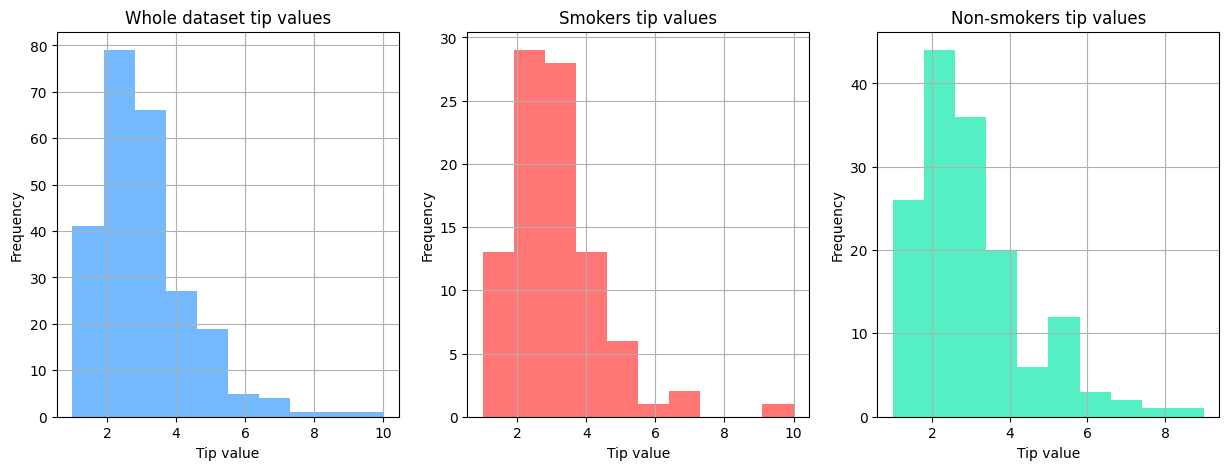

In [32]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

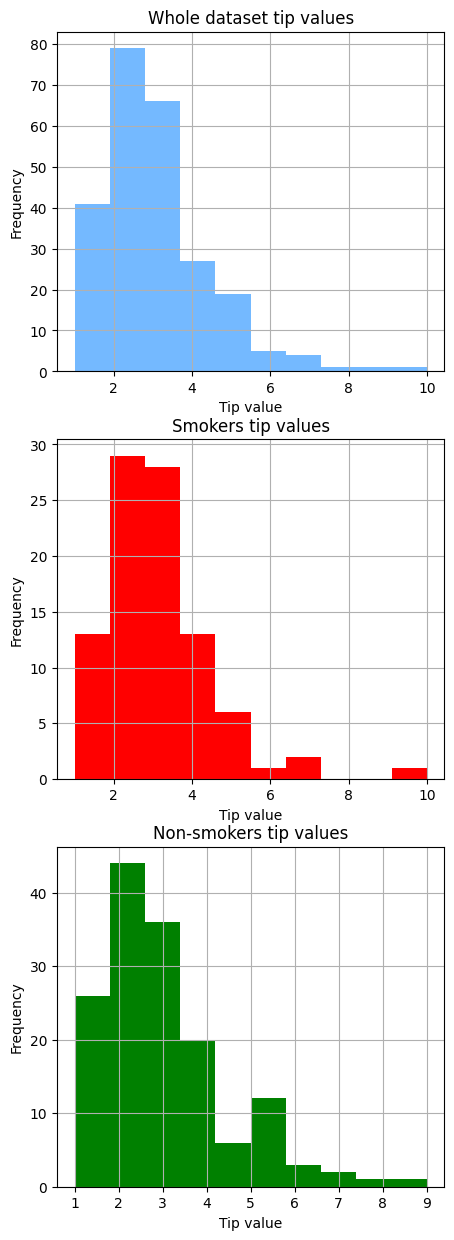

In [59]:
# alternative code
figure, axis = plt.subplots(3, 1, figsize=(5, 15))
axis[0].hist(df['tip'], color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

axis[1].hist(smokers_df['tip'], color='red')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)

axis[2].hist(non_smokers_df['tip'], color='green')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)

##### **üìù Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

### **üë®üë© Do males give more tips?**

Perform the same steps based on the column **sex**.

In [35]:
male_tip_df = df.query('sex == "Male"')
female_tip_df = df.query('sex == "Female"')


In [ ]:
Do the same taking into account only male. Use the following variables:

min => male_tip_min
max => male_tip_max
mean => male_tip_mean
median => male_tip_median

In [43]:
male_tip_min = male_tip_df['tip'].min()
male_tip_max = male_tip_df['tip'].max()
male_tip_mean = male_tip_df['tip'].mean()
male_tip_median = male_tip_df['tip'].median()

1.0 10.0 3.0896178343949043


In [38]:
female_tip_min = female_tip_df['tip'].min()
female_tip_max = female_tip_df['tip'].max()
female_tip_mean = female_tip_df['tip'].mean()
female_tip_median = female_tip_df['tip'].median()



In [45]:
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

0
min      1.0000
max     10.0000
mean     3.0896
median   3.0000

In [46]:
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

0
min     1.0000
max     6.5000
mean    2.8334
median  2.7500

In [47]:
all_vals_dict2 = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Females': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct_2 = pd.DataFrame(all_vals_dict2)
# Output the dataframe
all_mct_2

Common      Males   Females
min      1.000000   1.000000  1.000000
max     10.000000  10.000000  6.500000
mean     2.998279   3.089618  2.833448
median   2.900000   3.000000  2.750000

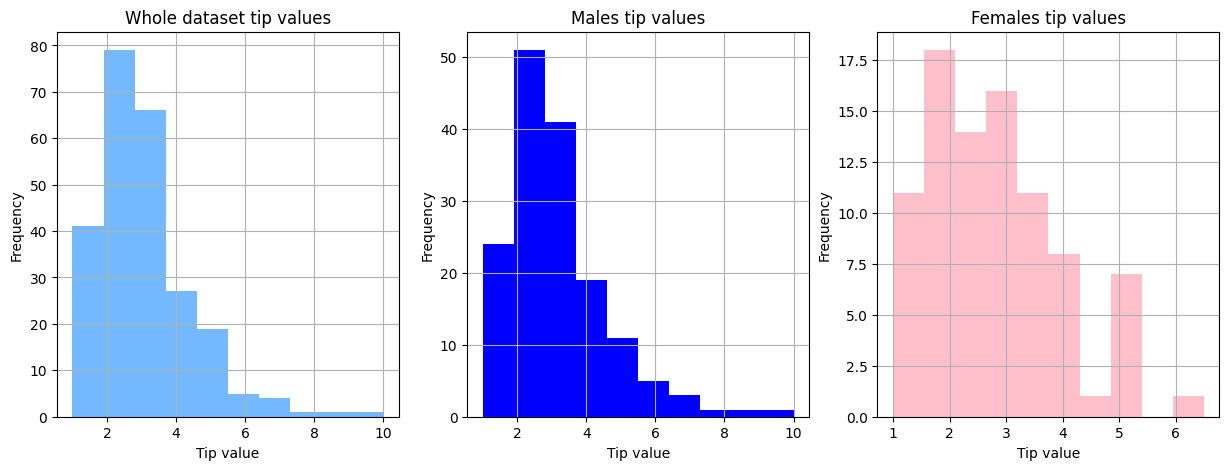

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(male_tip_df['tip'], color='blue')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(female_tip_df['tip'], color='pink')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')
plt.grid(True)

### **üìÜ Do weekends bring more tips?**

Perform the same steps based on the column **day**.

### **üïë Do dinners bring more tips?**

Perform the same steps based on the column **time**.